# MVP

The goal of this project is to pitch the promising use cases of "on-chain analytics" to custody and financial services company "Unchained Capital". Price data was pulled from Kaggle and most other columns were pulled from glassnode.com. The data was cleaned using Google Sheets, and final visualisations will be done in Tableau. But for the MVP, a jupyter notebook was convenient.

There are 2 main use cases I see for on-chain analytics at Unchained Capital. The first is to create a user friendly dashboard so that customers can look at this data and use it to time the market if they wish to. The second use case is to study these metrics alongside metrics related to UC's customer behavior and see if any insights emerge. 

Below are graphs of 2 potentially useful metrics. Both are plotted on the same chart as the BTC/USD price with a logarithmic y-axis. 

The first one is NUPL which stands for 'Net Unrealized Profit & Loss' and it is a ratio of the current price to the price at which the bitcoins were last used in a transaction. This could be one for the user dashboard.

The second one is called 'balanced price' which is a time-weighted price metric and has so far been a good indicator of long term cycle bottoms. This could be used internally to help decide how much collateral a customer needs to put up to get a loan.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('/users/nhuvelle/Desktop/BTC_CSV.csv')
df

,timestamp,price,aSOPR,NUPL,Puell multiple,balanced price,RHODL ratio
0,2010-07-17T00:00:00Z,0.049510,1.000000,NaN,NaN,0.049510,NaN
1,2010-07-18T00:00:00Z,0.085840,1.198127,0.421756,NaN,0.049586,NaN
2,2010-07-19T00:00:00Z,0.080800,1.378311,0.380821,NaN,0.049960,NaN
3,2010-07-20T00:00:00Z,0.074733,NaN,0.328775,NaN,0.050090,NaN
4,2010-07-21T00:00:00Z,0.079210,NaN,0.365481,NaN,0.050155,NaN
...,...,...,...,...,...,...,...
4016,2021-07-15T00:00:00Z,31671.443050,0.970634,0.390736,0.945019,16175.020000,4748.566405
4017,2021-07-16T00:00:00Z,31426.899480,0.974373,0.386512,1.094450,16157.547020,4991.279461
4018,2021-07-17T00:00:00Z,31548.922960,1.195683,0.386471,1.034171,16205.416280,5418.944202
4019,2021-07-18T00:00:00Z,31814.348280,0.980923,0.391851,1.047615,16196.762560,5462.578560


In [3]:
df.fillna(0)

,timestamp,price,aSOPR,NUPL,Puell multiple,balanced price,RHODL ratio
0,2010-07-17T00:00:00Z,0.049510,1.000000,0.000000,0.000000,0.049510,0.000000
1,2010-07-18T00:00:00Z,0.085840,1.198127,0.421756,0.000000,0.049586,0.000000
2,2010-07-19T00:00:00Z,0.080800,1.378311,0.380821,0.000000,0.049960,0.000000
3,2010-07-20T00:00:00Z,0.074733,0.000000,0.328775,0.000000,0.050090,0.000000
4,2010-07-21T00:00:00Z,0.079210,0.000000,0.365481,0.000000,0.050155,0.000000
...,...,...,...,...,...,...,...
4016,2021-07-15T00:00:00Z,31671.443050,0.970634,0.390736,0.945019,16175.020000,4748.566405
4017,2021-07-16T00:00:00Z,31426.899480,0.974373,0.386512,1.094450,16157.547020,4991.279461
4018,2021-07-17T00:00:00Z,31548.922960,1.195683,0.386471,1.034171,16205.416280,5418.944202
4019,2021-07-18T00:00:00Z,31814.348280,0.980923,0.391851,1.047615,16196.762560,5462.578560


<AxesSubplot:>

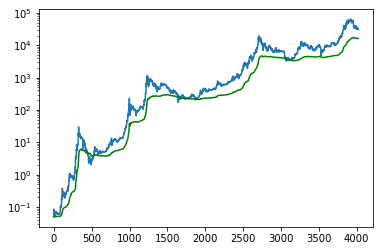

In [4]:
df['price'].plot(logy=True)
df['balanced price'].plot(logy=True, style='g')

<AxesSubplot:label='180e907f-723d-4702-8af2-4c514c4a6b4a'>

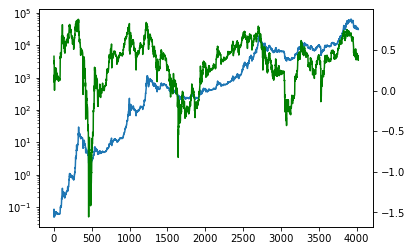

In [5]:
df['price'].plot(logy=True)
df['NUPL'].plot(secondary_y = True, style='g')